In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.



Has the network latency gone up since we switched internet service providers?

    H0:  There is no change in network latency since we switched internet service providers
    Ha:  There is an increase in latency since we switched internet service providers
        
    True Positive:  we determine latency has changed, and in reality that is true
    True Negative:  we determine latency hasn't changed, and in reality that is true
    
    Type I:  we determine latency has changed, but in reality it hasn't
    Type II: we determine latency hasn't changed, but in reality is has

Is the website redesign any good?

    H0:  There is no change in traffic since the redesign
    Ha:  There is less traffic since the redesign
        
    True Positive:  we determine traffic has changed, and in reality that is true
    True Negative:  we determine traffic hasn't changed, and in reality that is true

    Type I:  we determine traffic has changed, but in reality it hasn't
    Type II: we determine traffic hasn't changed, but in reality is has

Is our television ad driving more sales?

    H0:  There is no increase in sales since the ad aired
    Ha:  There is more sales since the ad aired

    True Positive:  we determine sales have increased, and in reality that is true
    True Negative:  we determine sales haven't increased, and in reality that is true

    Type I:  we determine sales have increased, but in reality they haven't
    Type II: we determine sales havn't increased, but in reality they have 

Ace Realty wants to determine whether the average time it takes to sell homes is different 
for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a 
standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days 
and a standard deviation of 20 days. Use a .05 level of significance.

    H0 = office 1 time to sell is == to office 2
    Ha = office 1 time to sell is != to office 2

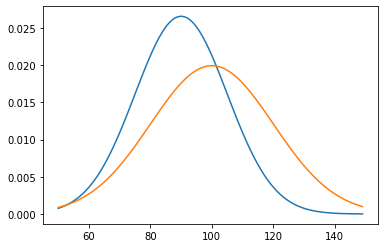

In [25]:
x = np.arange(50,150)
y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)
plt.plot(x,y1, label='y1')
plt.plot(x,y2, label='y2')
plt.show()

In [26]:
t, p = stats.ttest_ind_from_stats(mean1=90.0, std1=15, nobs1=40,
                                  mean2=100, std2=20, nobs2=50,
                                  equal_var=False)

α = .05
t,p

(-2.7091418459143854, 0.00811206270346016)

In [29]:
#is p < α?   if true reject the null

p < α


True

Reject the null hypothosis, the time it takes to sell in office 1 is significantly different from
the time it takes in office 2

# Load the mpg dataset and use it to answer the following questions:


In [4]:
df = data('mpg')

# creating a mpg field averaging the city and hwy mileage
df['mpg'] = (df['cty'] + df['hwy']) / 2

#display first few rows of data
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [5]:
new = df[df.year == 2008]
old = df[df.year == 1999]

α = .05

# find confidence level to determine if variance is True/False
    #H0 variance is equal
    #Ha variance is inqual
stat, p = stats.levene(new.mpg, old.mpg)
p

0.855517569468803

    H0 = 2008 cars have == fuel efficiency to 1999 cars
    Ha = 2008 cars have != fuel efficiency to 1999 cars
    
            p > α so var = True

In [6]:
t, p = stats.ttest_ind(new.mpg, old.mpg, equal_var=True)

In [36]:
# Is the p-value greater than alpha? if so than reject null hyp

p > α

False

We cannot reject the null hypothesis.  There is not a significant difference in fuel-efficiency in cars from 2008 vs 1999

# Are compact cars more fuel-efficient than the average car?


In [8]:
compact = df[df['class'] == 'compact']
α = .05


μth = df.mpg.mean()

    H0 = compact cars are not more fuel efficient than the average car ( mileage <= average )
    Ha = compact cars are more fuel efficient than the average car (mileage > average )

In [9]:
t, p = stats.ttest_1samp(compact.mpg, μth)
t, p

(7.896888573132535, 4.1985637943171186e-10)

In [10]:
if ((p / 2) < α) and (t > 0):
    print('we can reject the null hypothesis')
else: 
    print('we fail to reject the null hypothesis')

we can reject the null hypothesis


compact cars are more fuel efficient that the average car



# Do manual cars get better gas mileage than automatic cars?

In [33]:
manual = df[df['trans'].str.contains("manual")]
auto = df[df['trans'].str.contains("auto")]
α = .05

stat, p = stats.levene(manual.mpg, auto.mpg)
p

0.6545276355131857

    H0 = manual cars do not get better gas mileage than automatic cars (manual mpg <= auto mpg)
    Ha = manual cars get better gas mileage than automatic cars (manual mpg >= auto mpg)
    
                p > α so var = True

In [34]:
t, p = stats.ttest_ind(manual.mpg, auto.mpg, equal_var=True)
t,p

(4.593437735750014, 7.154374401145685e-06)

In [37]:
# Is the p-value/2 less than alpha and t > 0? if so than reject null hyp

(p/2 < α) and (t > 0)

True

The null hypothesis is rejected, manual cars get better gas mileage